This is my analysis of Riverkeeper (www.riverkeeper.org) data on Hudson River Enterococcus levels

First I load data and libraries:

In [1]:
from pandas import DataFrame, Series, to_datetime, read_csv
from bokeh.charts import TimeSeries, show, output_file
import seaborn as sns
%matplotlib inline

In [2]:
river_entero = read_csv('data/riverkeeper_data_2013.csv')

Let's look at the data:

In [4]:
river_entero[10:16]

,Site,Date,EnteroCount,FourDayRainTotal,SampleCount
10,Hudson above Mohawk River,6/16/2012,10,0.2,35
11,Hudson above Mohawk River,5/20/2012,11,0.0,35
12,Hudson above Mohawk River,6/24/2013,30,1.4,35
13,Hudson above Mohawk River,9/19/2011,11,0.1,35
14,Hudson above Mohawk River,8/21/2011,231,0.4,35
15,Hudson above Mohawk River,7/14/2011,11,0.3,35


In [5]:
river_entero.describe()

,FourDayRainTotal,SampleCount
count,3397.000000,3397.000000
mean,0.568001,56.886370
std,1.000387,41.588476
min,0.000000,27.000000
25%,0.000000,37.000000
50%,0.200000,42.000000
75%,0.700000,50.000000
max,8.500000,187.000000


uh oh: python is not recognizing Date and EnteroCount as numeric fields! Let's fix that

In [6]:
river_entero['Date'] = Series([to_datetime(d) for d in river_entero['Date']])

I am going to remove the non-numeric values from EnteroCount: you MUST convert them though

In [7]:
river_entero['EnteroCount'] = river_entero['EnteroCount'].convert_objects(convert_numeric=True)

/Users/josh.laurito/anaconda/envs/py/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


In [8]:
river_entero = river_entero.dropna(axis=0)

In [9]:
river_entero.describe()

,EnteroCount,FourDayRainTotal,SampleCount
count,2746.000000,2746.000000,2746.000000
mean,249.510197,0.587436,57.268390
std,954.885002,1.040719,43.284829
min,0.000000,0.000000,27.000000
25%,10.000000,0.000000,36.000000
50%,24.000000,0.200000,40.000000
75%,107.000000,0.800000,50.000000
max,24196.000000,8.500000,187.000000


Ok, let's make some graphs

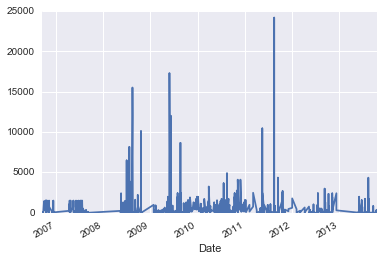

In [10]:
ts = river_entero['EnteroCount']
ts.index= river_entero['Date']

ts.plot()

Let's try a plot with Seaborn

In [11]:
type(river_entero['Date'][0])

pandas.tslib.Timestamp

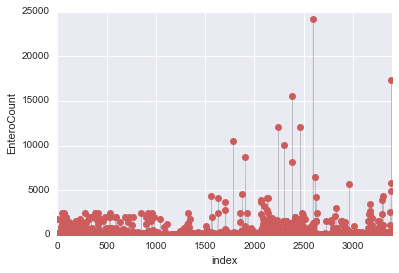

In [12]:
# docs at http://web.stanford.edu/~mwaskom/software/seaborn/tutorial/timeseries_plots.html
river_entero['unit'] = 'Entero Count'

sns.tsplot(river_entero.reset_index(), 
           time="index", 
           unit="unit",
           value="EnteroCount",
           color="indianred",
           interpolate=False)
